In [1]:
import os
import pandas as pd

In [2]:
weather_df = pd.read_csv(r"C:\Users\Hello\DS Project\Cleaned_dataset\weather_data_with_hour.csv")

In [3]:
print(weather_df.head())

   temperature_2m  relative_humidity_2m  rain  wind_speed_10m   date_only  \
0            18.5                    95   0.0             8.0  2020-01-01   
1            19.5                    90   0.0             6.8  2020-01-01   
2            20.8                    79   0.0             6.2  2020-01-01   
3            22.2                    69   0.0             5.6  2020-01-01   
4            23.0                    65   0.0             8.0  2020-01-01   

   hour  
0     0  
1     1  
2     2  
3     3  
4     4  


In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature_2m        41640 non-null  float64
 1   relative_humidity_2m  41640 non-null  int64  
 2   rain                  41640 non-null  float64
 3   wind_speed_10m        41640 non-null  float64
 4   date_only             41640 non-null  object 
 5   hour                  41640 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 1.9+ MB


In [6]:
summary_stats = weather_df.describe()
print(summary_stats)

       temperature_2m  relative_humidity_2m          rain  wind_speed_10m  \
count    41640.000000          41640.000000  41640.000000    41640.000000   
mean        24.368677             79.664601      0.258768        9.474306   
std          5.620843             14.064569      1.066119        4.596754   
min          6.500000             22.000000      0.000000        0.000000   
25%         20.500000             70.000000      0.000000        6.000000   
50%         25.300000             82.000000      0.000000        8.900000   
75%         28.300000             92.000000      0.100000       12.400000   
max         41.100000            100.000000     26.400000       60.700000   

              hour  
count  41640.00000  
mean      11.50000  
std        6.92227  
min        0.00000  
25%        5.75000  
50%       11.50000  
75%       17.25000  
max       23.00000  


Univariate Analysis

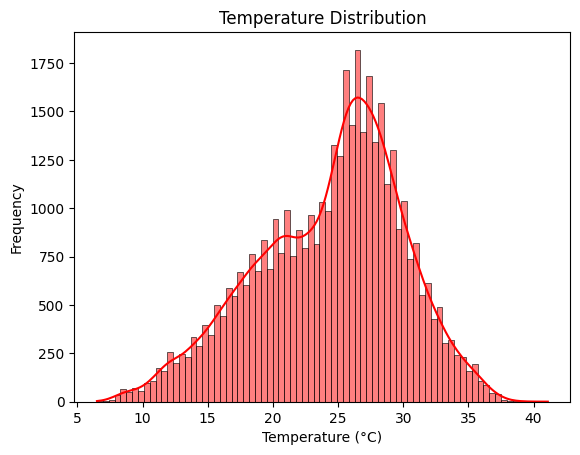

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(weather_df['temperature_2m'], kde=True, color='red')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

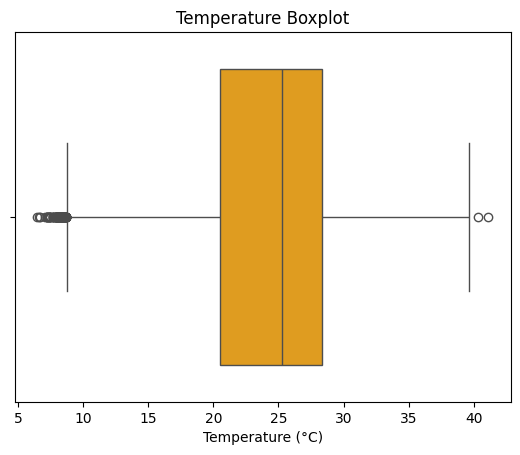

In [12]:
sns.boxplot(x=weather_df['temperature_2m'], color='orange')
plt.title("Temperature Boxplot")
plt.xlabel("Temperature (°C)")
plt.show()


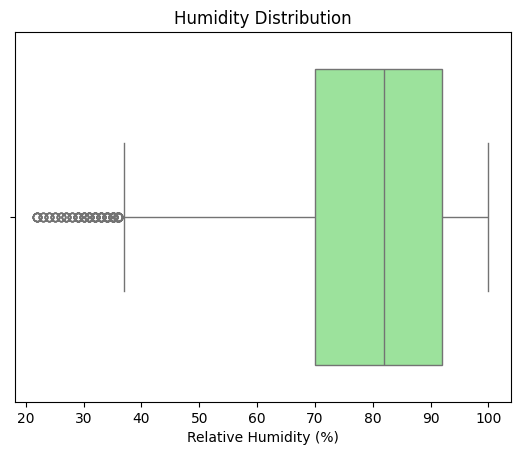

In [10]:
sns.boxplot(x=weather_df['relative_humidity_2m'], color='lightgreen')
plt.title("Humidity Distribution")
plt.xlabel("Relative Humidity (%)")
plt.show()


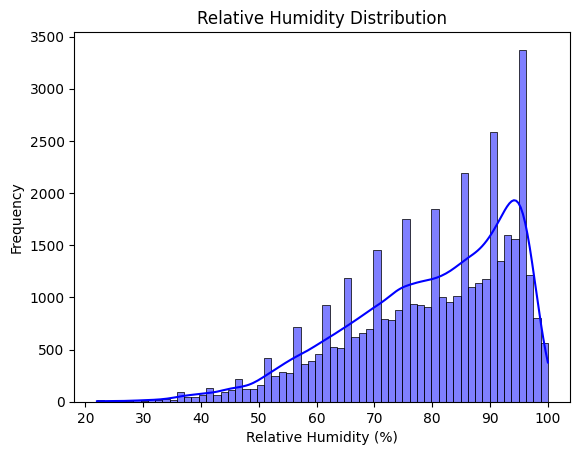

In [13]:
sns.histplot(weather_df['relative_humidity_2m'], kde=True, color='blue')
plt.title("Relative Humidity Distribution")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Frequency")
plt.show()


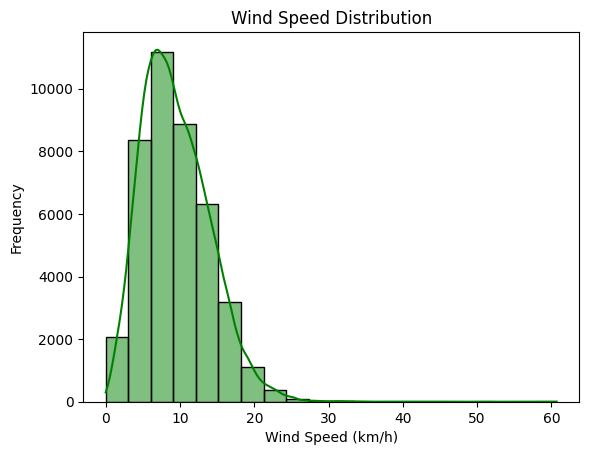

In [18]:
sns.histplot(weather_df['wind_speed_10m'], bins=20, kde=True, color='green')
plt.title("Wind Speed Distribution")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Frequency")
plt.show()

Correlation Analysis

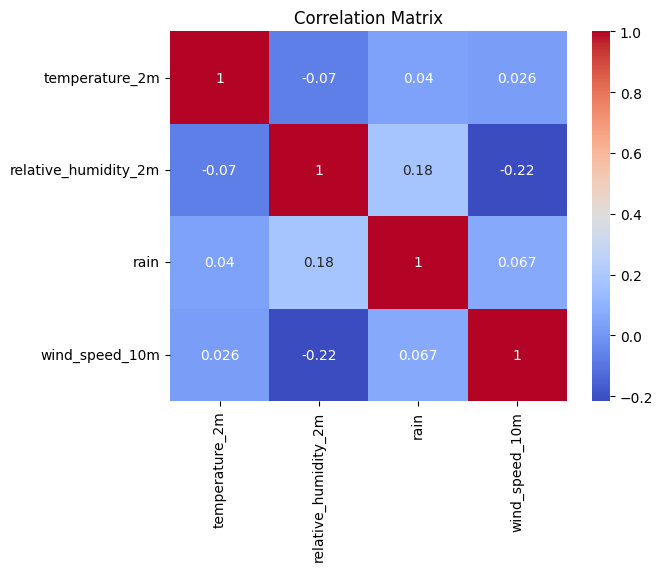

In [19]:
corr = weather_df[['temperature_2m', 'relative_humidity_2m', 'rain', 'wind_speed_10m']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


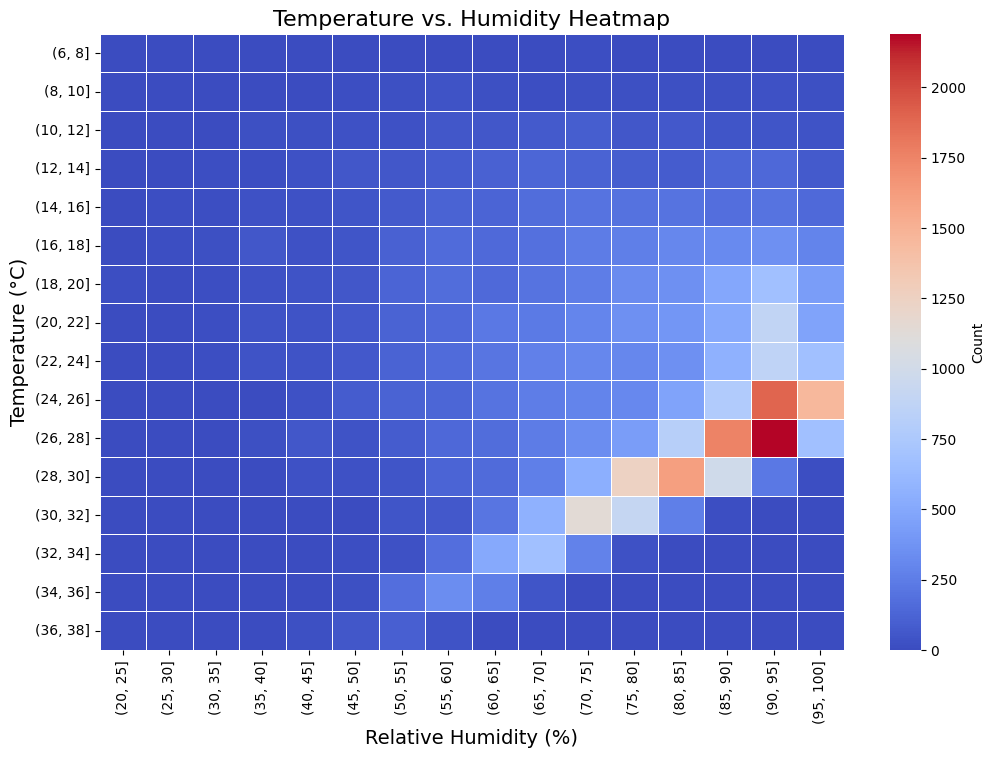

In [29]:
import numpy as np

plt.figure(figsize=(12, 8))
heatmap_data = pd.crosstab(
    index=pd.cut(weather_df['temperature_2m'], bins=np.arange(-10, 40, 2)),
    columns=pd.cut(weather_df['relative_humidity_2m'], bins=np.arange(0, 101, 5))
)

sns.heatmap(heatmap_data, cmap="coolwarm", cbar_kws={'label': 'Count'}, linewidths=0.5)
plt.title("Temperature vs. Humidity Heatmap", fontsize=16)
plt.xlabel("Relative Humidity (%)", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.show()



C:\Users\Hello\AppData\Local\Temp\ipykernel_21448\3977830654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


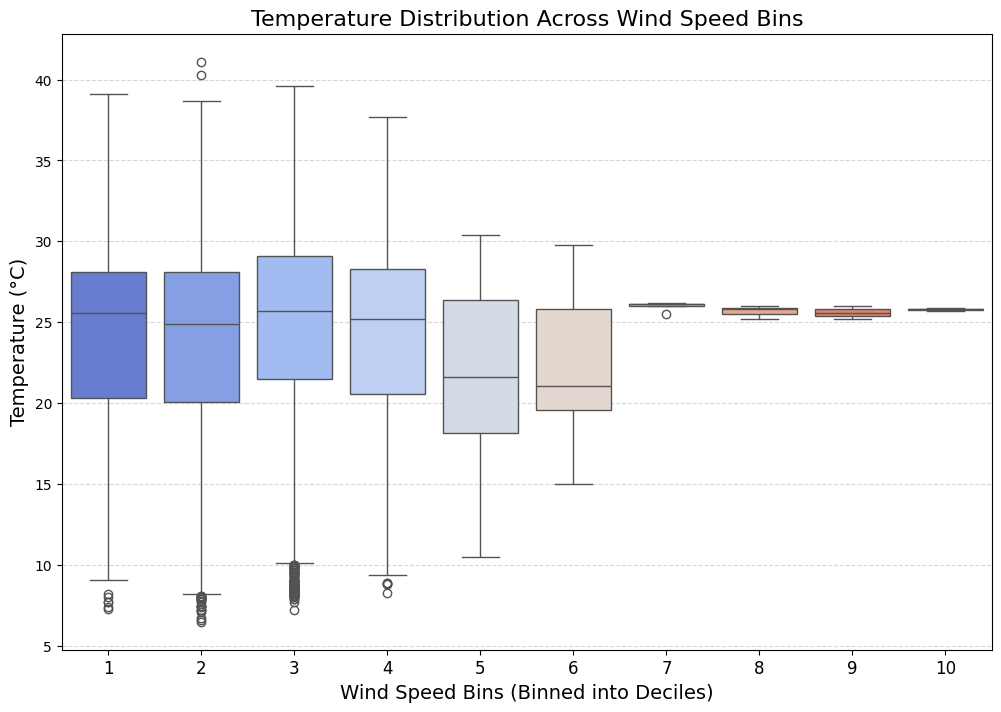

In [34]:
weather_df['wind_speed_bin'] = pd.cut(weather_df['wind_speed_10m'], bins=10, labels=False)

plt.figure(figsize=(12, 8))
sns.boxplot(
    x='wind_speed_bin', 
    y='temperature_2m', 
    data=weather_df, 
    palette='coolwarm'
)
plt.title("Temperature Distribution Across Wind Speed Bins", fontsize=16)
plt.xlabel("Wind Speed Bins (Binned into Deciles)", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.xticks(ticks=range(10), labels=[f"{i+1}" for i in range(10)], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Seasonal Analysis

C:\Users\Hello\AppData\Local\Temp\ipykernel_21448\2076142197.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='temperature_2m', data=seasonal_daily_data, palette='coolwarm')


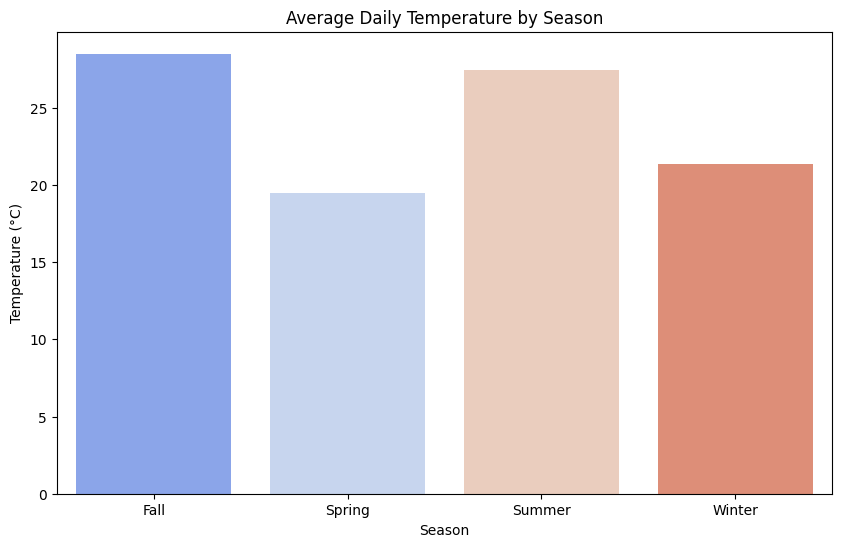

C:\Users\Hello\AppData\Local\Temp\ipykernel_21448\2076142197.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='relative_humidity_2m', data=seasonal_daily_data, palette='Blues')


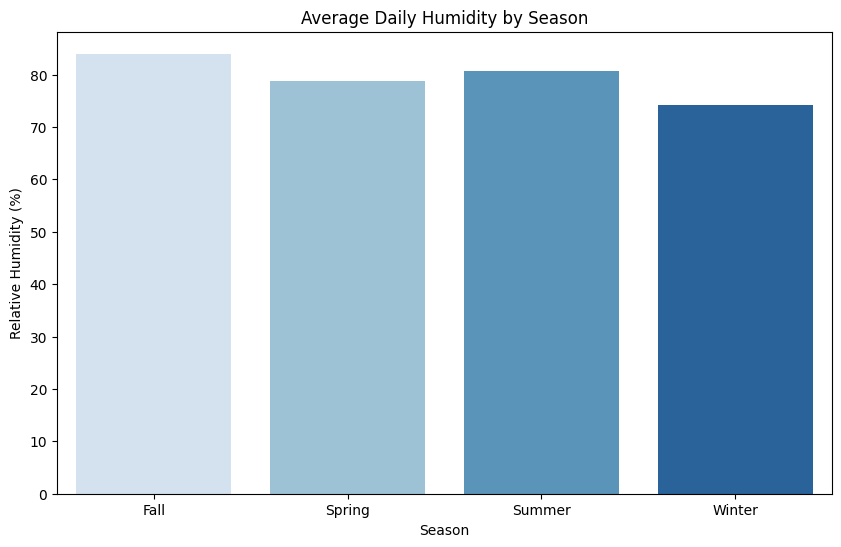

C:\Users\Hello\AppData\Local\Temp\ipykernel_21448\2076142197.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='rain', data=seasonal_daily_data, palette='Blues')


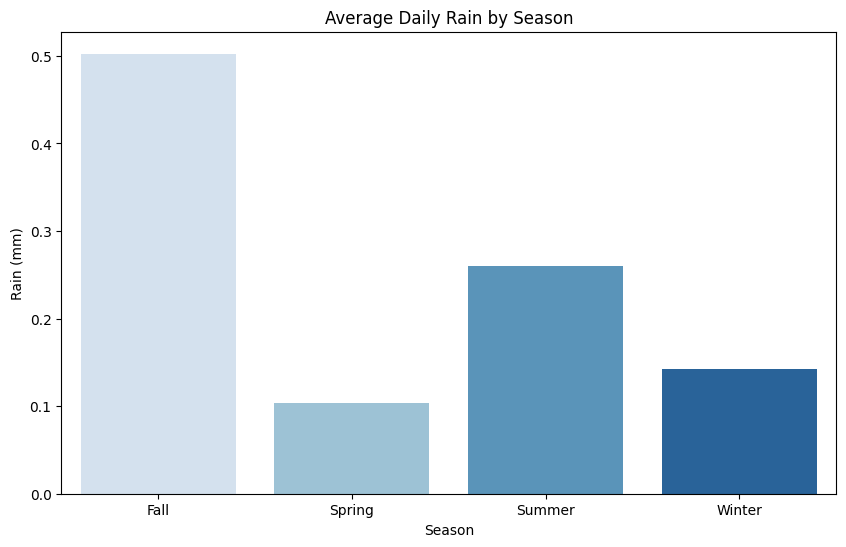

In [53]:
# Extract date (without time) from 'date_only' column
weather_df['date'] = weather_df['date_only'].dt.date
def get_season(month):
    if month in [12, 11, 10]:
        return 'Winter'
    elif month in [3, 1, 2]:
        return 'Spring'
    elif month in [4, 5, 6]:
        return 'Summer'
    else:
        return 'Fall'
# Assign each day to a season based on the month
weather_df['season'] = weather_df['date_only'].dt.month.apply(get_season)

# Group by date and season, and calculate the mean for each day
daily_data = weather_df.groupby(['season', 'date'])[['temperature_2m', 'relative_humidity_2m', 'rain']].mean().reset_index()

# Now calculate the seasonal averages by grouping by season
seasonal_daily_data = daily_data.groupby('season')[['temperature_2m', 'relative_humidity_2m', 'rain']].mean().reset_index()

# Plot the seasonal average temperature
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='temperature_2m', data=seasonal_daily_data, palette='coolwarm')
plt.title("Average Daily Temperature by Season")
plt.xlabel("Season")
plt.ylabel("Temperature (°C)")
plt.show()

# Plot the seasonal average humidity
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='relative_humidity_2m', data=seasonal_daily_data, palette='Blues')
plt.title("Average Daily Humidity by Season")
plt.xlabel("Season")
plt.ylabel("Relative Humidity (%)")
plt.show()

# Plot the seasonal average rain
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='rain', data=seasonal_daily_data, palette='Blues')
plt.title("Average Daily Rain by Season")
plt.xlabel("Season")
plt.ylabel("Rain (mm)")
plt.show()


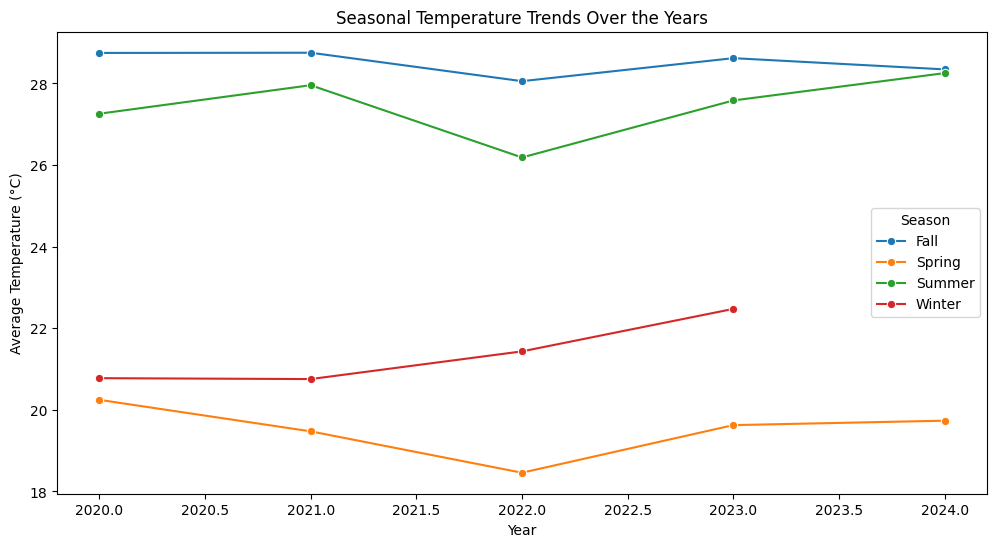

In [54]:
weather_df['year'] = weather_df['date_only'].dt.year
seasonal_temp_trends = weather_df.groupby(['year', 'season'])['temperature_2m'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='temperature_2m', hue='season', data=seasonal_temp_trends, marker='o')
plt.title("Seasonal Temperature Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.legend(title="Season")
plt.show()

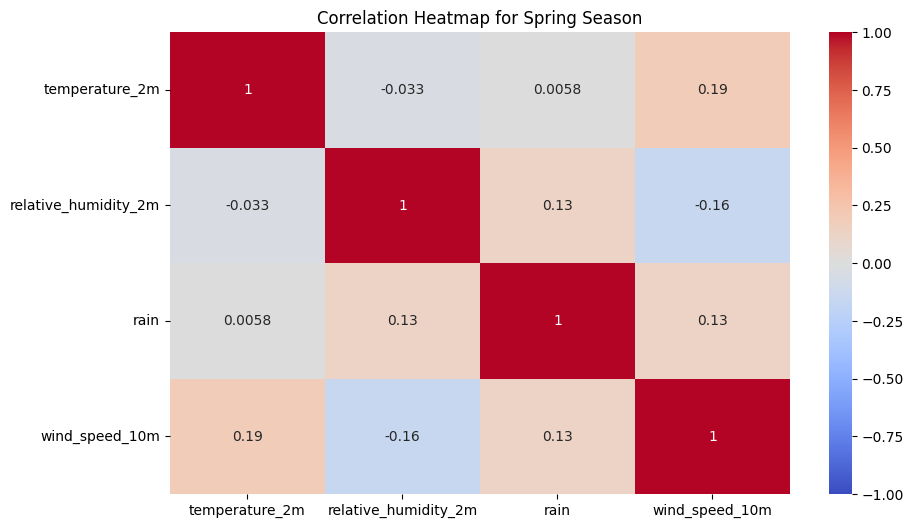

In [55]:
seasonal_corr = weather_df.groupby('season')[['temperature_2m', 'relative_humidity_2m', 'rain', 'wind_speed_10m']].corr()

# Plot heatmap for correlations in the spring season (example)
plt.figure(figsize=(10, 6))
sns.heatmap(seasonal_corr.loc['Spring'], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Spring Season")
plt.show()

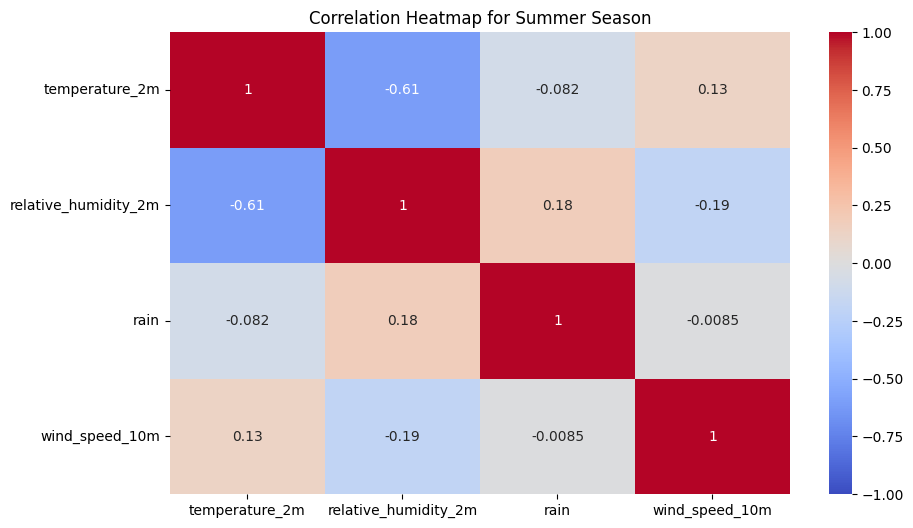

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(seasonal_corr.loc['Summer'], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Summer Season")
plt.show()

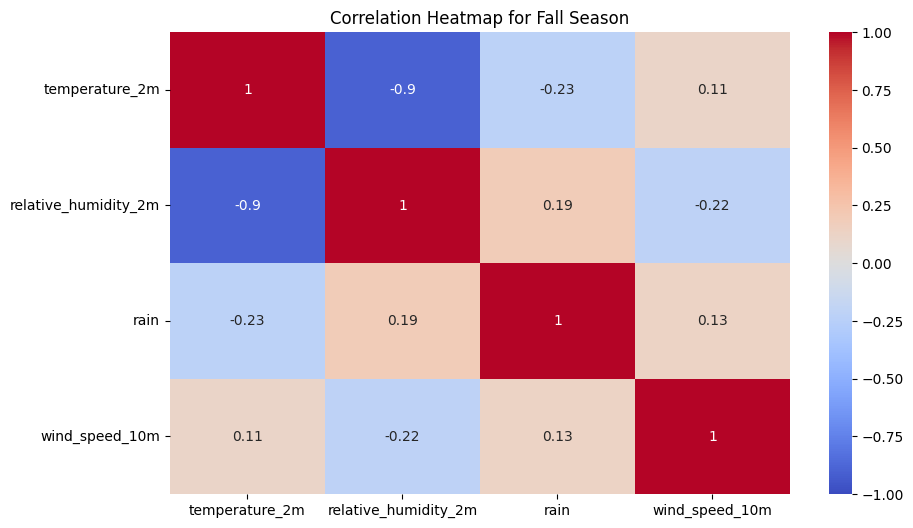

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(seasonal_corr.loc['Fall'], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Fall Season")
plt.show()

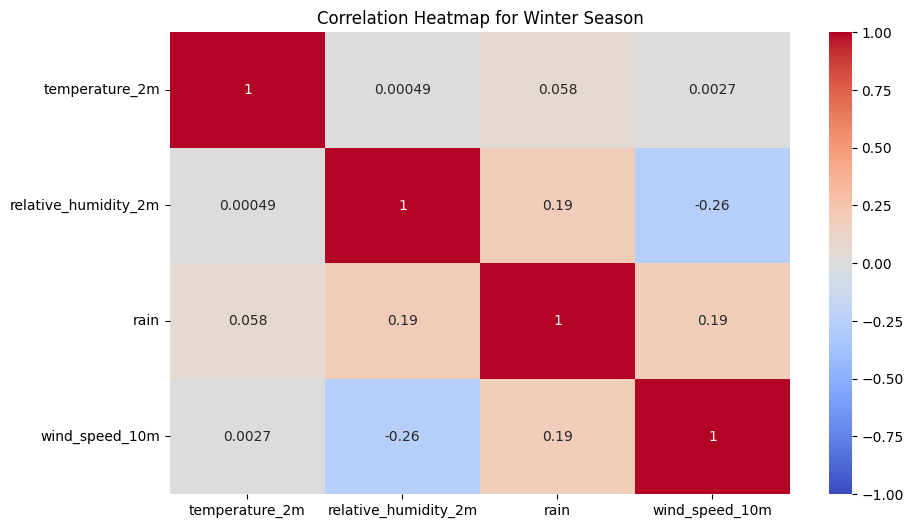

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(seasonal_corr.loc['Winter'], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Winter Season")
plt.show()

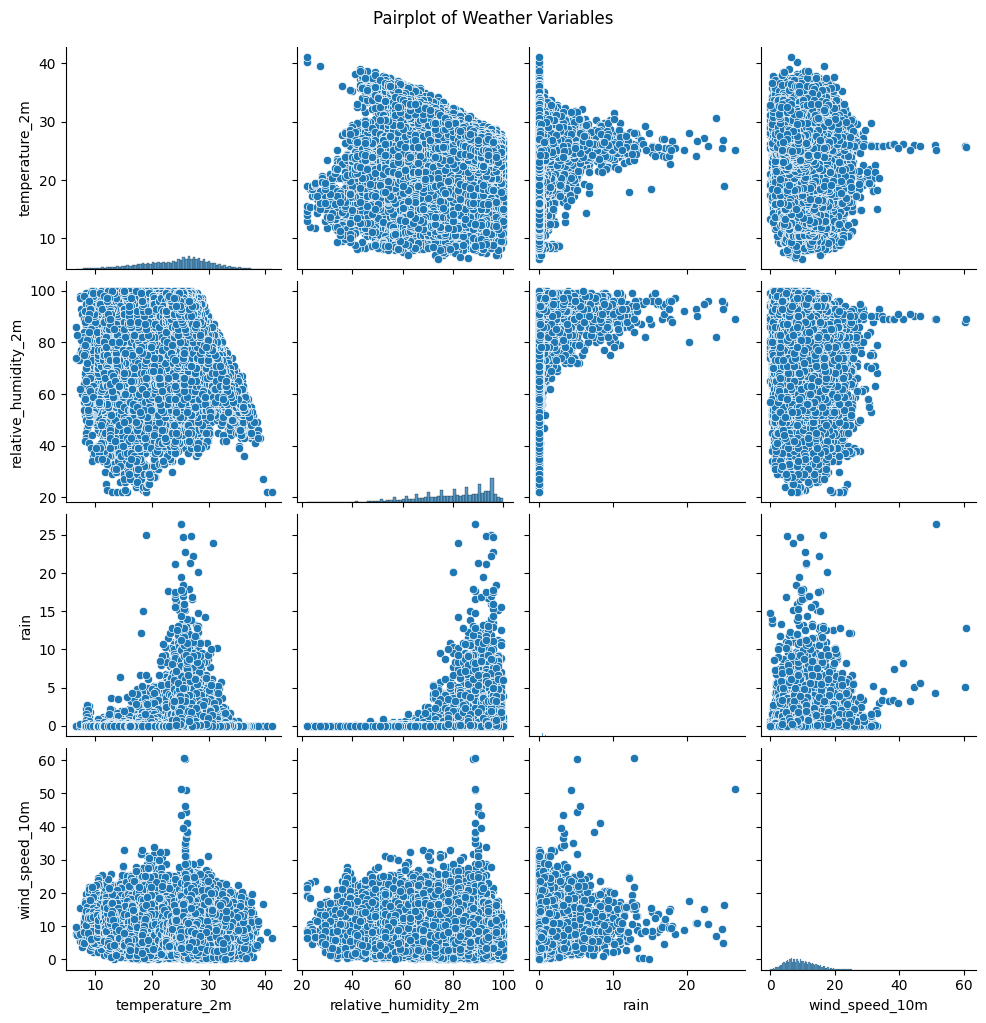

In [65]:
correlation_columns = ['temperature_2m', 'relative_humidity_2m', 'rain', 'wind_speed_10m']
sns.pairplot(weather_df[correlation_columns])
plt.suptitle("Pairplot of Weather Variables", y=1.02)
plt.show()

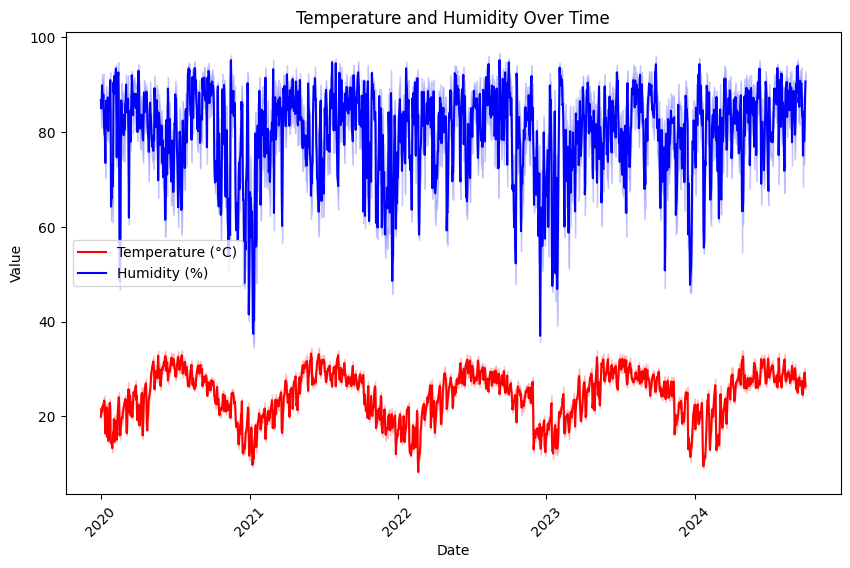

In [67]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date_only', y='temperature_2m', data=weather_df, label='Temperature (°C)', color='red')
sns.lineplot(x='date_only', y='relative_humidity_2m', data=weather_df, label='Humidity (%)', color='blue')
plt.title("Temperature and Humidity Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.show()


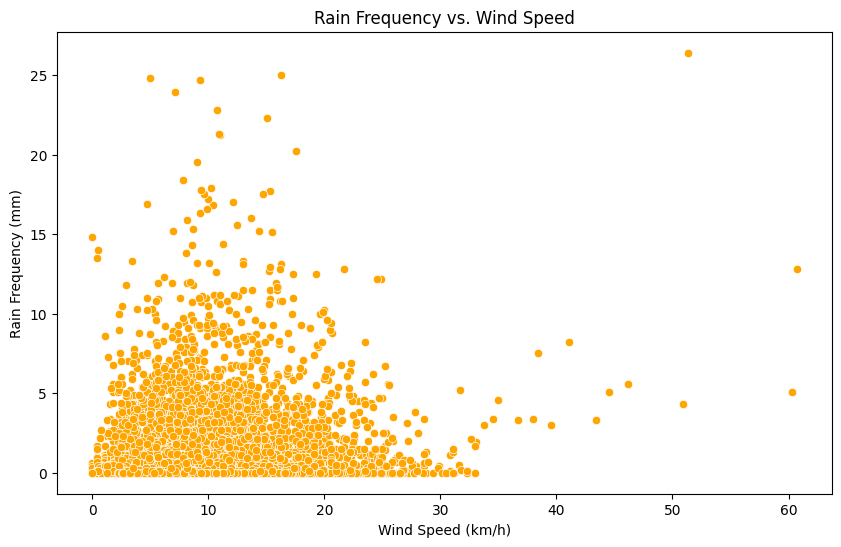

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed_10m', y='rain', data=weather_df, color='orange')
plt.title("Rain Frequency vs. Wind Speed")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Rain Frequency (mm)")
plt.show()


Extreme Condition Analysis

In [72]:
# Define temperature thresholds for extreme hot and cold events
hot_hours = weather_df[weather_df['temperature_2m'] > 35]
cold_hours = weather_df[weather_df['temperature_2m'] < 0]

# Count the number of extreme hot and cold events
hot_hours_count = hot_hours.shape[0]
cold_hours_count = cold_hours.shape[0]

print(f"Number of hot hours (>35°C): {hot_hours_count}")
print(f"Number of cold hours (<0°C): {cold_hours_count}")


Number of hot hours (>35°C): 578
Number of cold hours (<0°C): 0


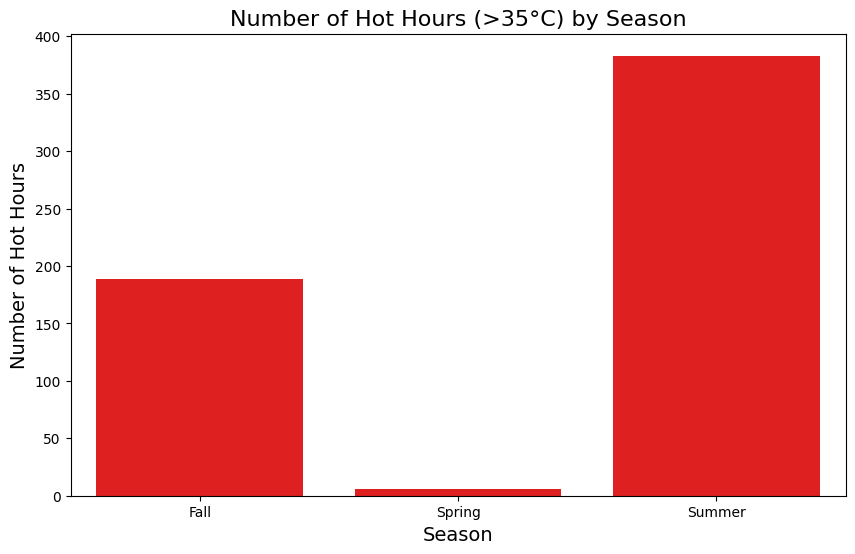

In [77]:
hot_hours_with_season = hot_hours.groupby('season').size().reset_index(name='hot_hours')
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='hot_hours', data=hot_hours_with_season, color='red')
plt.title("Number of Hot Hours (>35°C) by Season", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Number of Hot Hours", fontsize=14)
plt.show()

In [74]:
# Group by date and sum the rainfall for each day
daily_rain = weather_df.groupby('date_only')['rain'].sum().reset_index()

# Filter the days where the total rainfall is greater than 50mm
heavy_rain_days = daily_rain[daily_rain['rain'] > 50]

# Count the number of days with total rainfall > 50mm
heavy_rain_day_count = heavy_rain_days.shape[0]

print(f"Number of days with total rainfall > 50mm: {heavy_rain_day_count}")


Number of days with total rainfall > 50mm: 25


C:\Users\Hello\AppData\Local\Temp\ipykernel_21448\544022953.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='count', data=heavy_rain_by_season, palette='Blues')


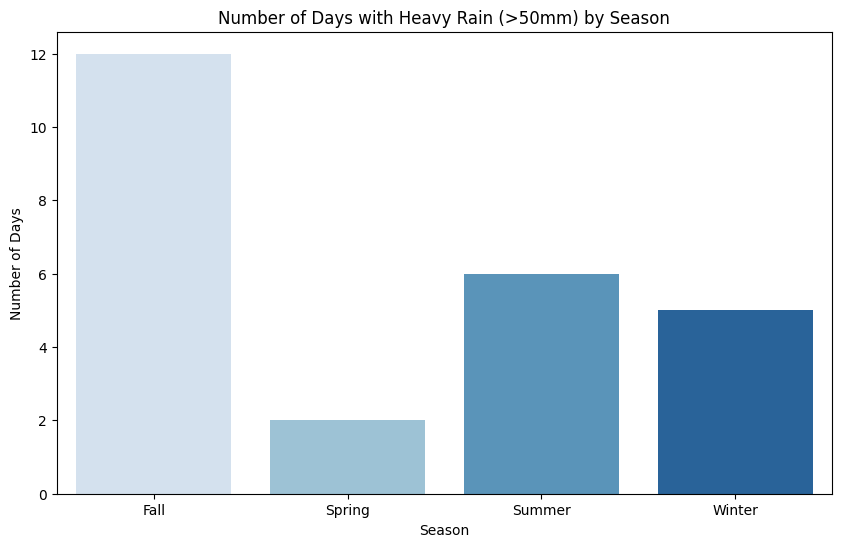

In [75]:
# Group by date and sum the rainfall for each day
daily_rain = weather_df.groupby('date_only')['rain'].sum().reset_index()

# Filter the days where the total rainfall is greater than 50mm
heavy_rain_days = daily_rain[daily_rain['rain'] > 50]

# Merge with the season information
heavy_rain_days_with_season = pd.merge(heavy_rain_days, weather_df[['date_only', 'season']].drop_duplicates(), on='date_only')

# Count the number of days with total rainfall > 50mm per season
heavy_rain_by_season = heavy_rain_days_with_season.groupby('season').size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=heavy_rain_by_season, palette='Blues')
plt.title("Number of Days with Heavy Rain (>50mm) by Season")
plt.xlabel("Season")
plt.ylabel("Number of Days")
plt.show()
